In [80]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd 

In [81]:
df = pd.read_csv(r"portfolio_data.csv")
df.head(10)

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285
5,5/8/2013,258.679993,54.385727,112.800003,29.801428
6,5/9/2013,260.160004,54.020340,117.699997,30.915714
7,5/10/2013,263.630005,54.357620,115.639999,31.098572
8,5/13/2013,264.510010,54.573097,111.400002,32.768570
9,5/14/2013,268.329987,55.275757,114.220001,33.424286


### Why Lstm? 
    - The time series like stocks, next word are need sequence
    - Lstm manages to follow the sequence

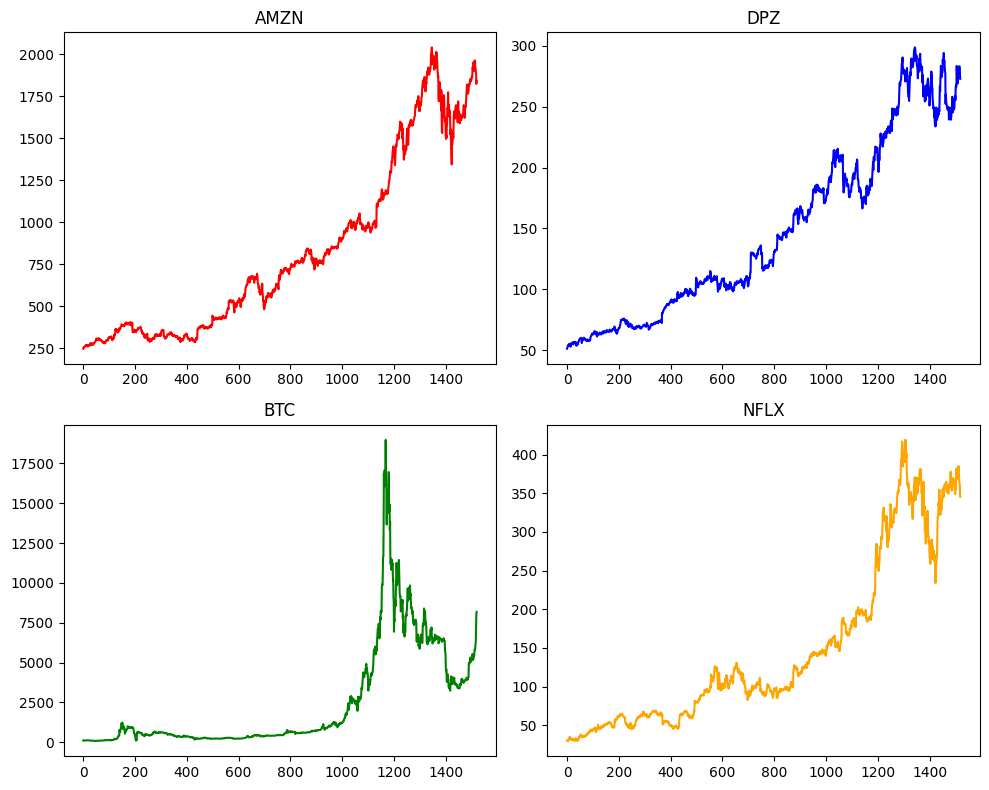

In [82]:
# as you see there is the pattern in the data 

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(df['AMZN'], color='red')
axs[0, 0].set_title("AMZN")

axs[0, 1].plot(df['DPZ'], color='blue')
axs[0, 1].set_title("DPZ")

axs[1, 0].plot(df['BTC'], color='green')
axs[1, 0].set_title("BTC")

axs[1, 1].plot(df['NFLX'], color='orange')
axs[1, 1].set_title("NFLX")

plt.tight_layout()
plt.show()


In [83]:
# we are going to predict the current output based upon previous 60 days input 

df = df.drop('Date', axis=1)
X = []
y = []
for i in range(60, len(df)):
    X.append(df.iloc[i-60:i, :].values) 
    y.append(df.iloc[i, :])  
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape, y.shape 

((1460, 60, 4), (1460, 4))

In [85]:
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, y, train_size=0.8, shuffle=False)

In [92]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),  # input_shape is (timesteps, features)
    tf.keras.layers.LSTM(32, return_sequences=False),  # LSTM layer with no sequences returned
    tf.keras.layers.Dense(100, activation="relu"),  # Dense layer with ReLU activation
    tf.keras.layers.Dense(4)  # Output layer, no activation for regression(ie.., linear activation)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 60, 64)            17664     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 100)               3300      
                                                                 
 dense_16 (Dense)            (None, 4)                 404       
                                                                 
Total params: 33,784
Trainable params: 33,784
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.fit(X_train, Y_train, validation_data= (X_val, Y_val), epochs=2, batch_size=64)

Epoch 1/2
19/19 [==============================] - 3s 49ms/step - loss: 3192815.7500 - accuracy: 0.7192 - val_loss: 10408073.0000 - val_accuracy: 1.0000
Epoch 2/2
19/19 [==============================] - 0s 17ms/step - loss: 3190099.0000 - accuracy: 0.7483 - val_loss: 10393273.0000 - val_accuracy: 1.0000


In [95]:
model.predict(X_val[:60])[-1] # also we predict the current output with previous 60 output

2/2 [==============================] - 0s 18ms/step


array([1.4952947 , 3.9407244 , 6.4536796 , 0.28018117], dtype=float32)